In [1]:
import random
import time
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Partition(A,p,r):
    pivot = A[r]
    i=p-1
    for j in range(p,r):
        if A[j] <= pivot:
            i=i+1
            A[i],A[j] = A[j],A[i]
    A[i+1],A[r] = A[r],A[i+1]
    return i+1

def Randomized_partition(A,p,r):
    i = random.randint(p,r)
    A[r],A[i] = A[i],A[r]
    return Partition(A,p,r)

def Partition_around(A,p,r,m):
    # Get index of m
    i = -1
    for j in range(p, r):
        if A[j] == m:
            i = j
            break
    # Swap m with last element in A
    A[i],A[r] = A[r],A[i]
    #Partition as usual
    return Partition(A,p,r)

In [3]:
def Iterative_randomized_select(A,p,r,i):
    ans=-1
    while(ans==-1):
        if p==r:
            ans = A[p]
        q = Randomized_partition(A,p,r)
        k=q-p+1
        if i==k:
            ans = A[q]
        if i<k:
            r=q-1
        elif i>k:
            p=q+1
            i=i-k
    return ans

def Iterative_select(A,p,r,i,G):
    ans=-1
    while(ans==-1):
        #print(f"A1:{A}")
        while((r-p+1)%G!=0):
            for j in range(p+1,r+1):
                if A[p] > A[j]:
                    A[p],A[j] = A[j],A[p]
            if i==1:
                ans = A[p]
            p=p+1
            i=i-1
        g = math.ceil((r-p+1)//G)
        # sort
        for j in range(p,p+g):
            if G == 3:
                selected_indices = [j,j+g,j+2*g]
            elif G == 5:
                selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g]
            elif G == 7:
                selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g,j+5*g,j+6*g]
            elif G == 9:
                selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g,j+5*g,j+6*g,j+7*g,j+8*g]
            selected_numbers = [A[x] for x in selected_indices if x <= r]
            selected_numbers.sort()
            for index, value in zip(selected_indices, selected_numbers):
                if index <= r:
                    A[index] = value
        #end sort
        #print(f"A2:{A}")
        # Get median of medians
        if g:
            medians = []
            for j in range(g):
                start = p + j*G
                end = min(start + G, r)
                # print(f"start:{start} , end:{end}")
                group = A[start:end+1]
                group.sort()
                # print(group)
                median = group[len(group)//2]
                medians.append(median)
            
            if g%2 ==0:
                x = medians[(g//2) -1]
            else:
                x = medians[g//2]
        # print(f"m={medians},p={p},r={r},g={g}")
        # print(f"x:{x}")
        # Done, x = median of medians

        q = Partition_around(A,p,r,x)

        k = q-p+1

        if i==k:
            ans=A[q]
        elif i<k:
            r = q-1
        elif i>k:
            p=q+1
            i=i-k
    return ans

In [4]:

def Calculate_time(N,K,elements,cnt):
    start_time = time.time()
    Iterative_randomized_select(elements.copy(),0,N-1,K)
    end_time = time.time()
    random_time = end_time - start_time
    Random_time.append(random_time)

    start_time = time.time()
    Iterative_select(elements.copy(),0,N-1,K,3)
    end_time = time.time()
    execution_3_time = end_time - start_time
    Select_3_time.append(execution_3_time)

    start_time = time.time()
    Iterative_select(elements.copy(),0,N-1,K,5)
    end_time = time.time()
    execution_5_time = end_time - start_time
    Select_5_time.append(execution_5_time)

    start_time = time.time()
    Iterative_select(elements.copy(),0,N-1,K,7)
    end_time = time.time()
    execution_7_time = end_time - start_time
    Select_7_time.append(execution_7_time)

    start_time = time.time()
    Iterative_select(elements.copy(),0,N-1,K,9)
    end_time = time.time()
    execution_9_time = end_time - start_time
    Select_9_time.append(execution_9_time)

    print(f"Round{cnt}: Random:{random_time:.2f} , 3:{execution_3_time:.2f} , 5:{execution_5_time:.2f} , 7:{execution_7_time:.2f} , 9:{execution_9_time:.2f}")


In [5]:
N=[]
for i in range(3,8):
    for j in range(10):
        # r_n = random.randint(10*i,10**i)
        r_n = 10**i
        N.append(r_n)
N.sort()
print(N)

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000]


In [6]:
# Calculate time
Random_time=[]
Select_3_time=[]
Select_5_time=[]
Select_7_time=[]
Select_9_time=[]
for i in range(50):
    K = random.randint(1,N[i]+1)
    random_numbers = [random.randint(1, N[i]+1) for _ in range(N[i])]
    Calculate_time(N[i],K,random_numbers,i+1)
All_time=[]
All_time.append(Random_time)
All_time.append(Select_3_time)
All_time.append(Select_5_time)
All_time.append(Select_7_time)
All_time.append(Select_9_time)

print(All_time)

Round1: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round2: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round3: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round4: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round5: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round6: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round7: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round8: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round9: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round10: Random:0.00 , 3:0.00 , 5:0.00 , 7:0.00 , 9:0.00
Round11: Random:0.00 , 3:0.01 , 5:0.01 , 7:0.01 , 9:0.01
Round12: Random:0.00 , 3:0.01 , 5:0.01 , 7:0.01 , 9:0.01
Round13: Random:0.00 , 3:0.01 , 5:0.01 , 7:0.01 , 9:0.01
Round14: Random:0.00 , 3:0.01 , 5:0.01 , 7:0.01 , 9:0.01
Round15: Random:0.00 , 3:0.01 , 5:0.01 , 7:0.01 , 9:0.01
Round16: Random:0.00 , 3:0.01 , 5:0.01 , 7:0.01 , 9:0.01
Round17: Random:0.00 , 3:0.01 , 5:0.01 , 7:0.01 , 9:0.01
Round18: Random:0.00 , 3:0.01 , 5:0.01 ,

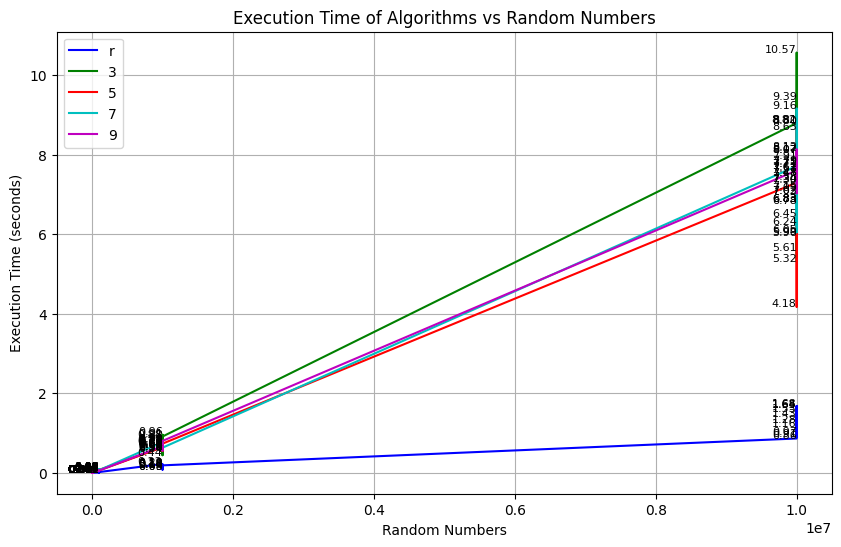

In [7]:
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm'] 
Alo = ['r','3','5','7','9']
for i in range(5):
    plt.plot(N, All_time[i], color=colors[i], label=f'{Alo[i]}')
    for j in range(len(N)):
        plt.text(N[j], All_time[i][j], f'{All_time[i][j]:.2f}', fontsize=8, ha='right')

plt.title('Execution Time of Algorithms vs Random Numbers')
plt.xlabel('Random Numbers')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
All_avg = []
avg_r_time=[]
avg_3_time=[]
avg_5_time=[]
avg_7_time=[]
avg_9_time=[]
for i in range(5):
    avg_r = 0
    avg_3 = 0
    avg_5 = 0
    avg_7 = 0
    avg_9 = 0
    for j in range(10):
        avg_r += Random_time[i*10 + j]
        avg_3 += Select_3_time[i*10 + j]
        avg_5 += Select_5_time[i*10 + j]
        avg_7 += Select_7_time[i*10 + j]
        avg_9 += Select_9_time[i*10 + j]
    avg_r_time.append(round(float(avg_r/10),2))
    avg_3_time.append(round(float(avg_3/10),2))
    avg_5_time.append(round(float(avg_5/10),2))
    avg_7_time.append(round(float(avg_7/10),2))
    avg_9_time.append(round(float(avg_9/10),2))
All_avg.append(avg_r_time)
All_avg.append(avg_3_time)
All_avg.append(avg_5_time)
All_avg.append(avg_7_time)
All_avg.append(avg_9_time)

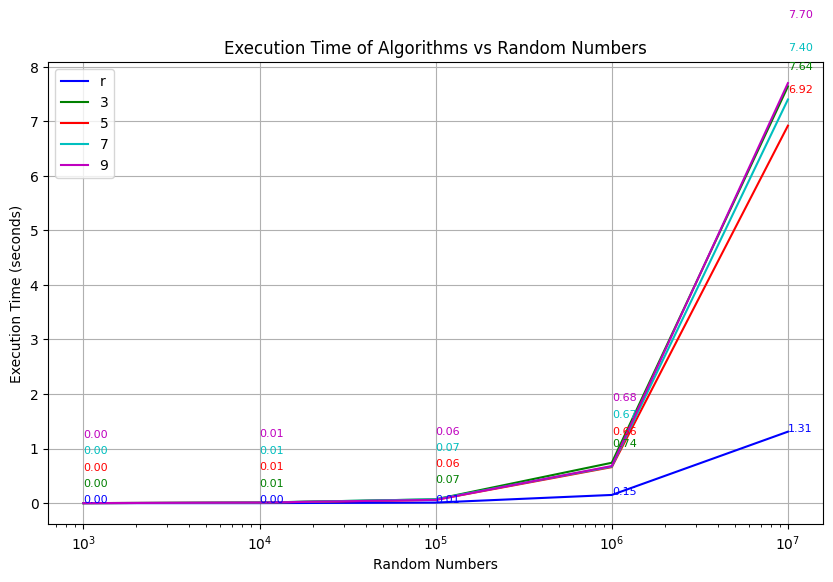

In [11]:
plt.figure(figsize=(10, 6))

colors = ['b', 'g', 'r', 'c', 'm'] 
Alo = ['r','3','5','7','9']
N2 = [1000,10000,100000,1000000,10000000]
for i in range(5):
    plt.plot(N2, All_avg[i], color=colors[i], label=f'{Alo[i]}')
    for j in range(len(N2)):
        y_offset = 0.15
        plt.text(N2[j], All_avg[i][j]+y_offset*i*2, f'{All_avg[i][j]:.2f}', fontsize=8, ha='left', color=colors[i])

plt.title('Execution Time of Algorithms vs Random Numbers')
plt.xlabel('Random Numbers')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.xticks(N2)
plt.grid(True)
plt.xscale('log')
plt.show()